# Sujet : Etude de l'action Airbus 01/01/2013 - 01/01/2023

Ines Somrani / Margaux Vergoz / Thierno Mamadou Diallo

In [13]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Recupération des données

In [14]:
#Via Yahoo Finance on récupère l'historique de l'action Airbus

#Definir le ticker
airb = 'AIR.PA'

#Recupération des données 
data=yf.Ticker(airb)

#Définition du data frame : historique des données de l'action Airbus journalières sur 10 ans (du 01/01/2013 au 01/01/2023)
df = data.history(period='1d', start='2013-1-1', end='2023-1-1')

#Affichage
df


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-01-02 00:00:00+01:00,25.370847,25.649926,25.269363,25.425817,1526764,0.0,0.0
2013-01-03 00:00:00+01:00,25.370852,25.561133,25.286282,25.539991,802652,0.0,0.0
2013-01-04 00:00:00+01:00,25.586500,26.089689,25.455418,26.047403,1547823,0.0,0.0
2013-01-07 00:00:00+01:00,26.089689,26.225000,25.992434,26.005119,1370626,0.0,0.0
2013-01-08 00:00:00+01:00,26.140429,26.372995,26.043175,26.153114,1911342,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-23 00:00:00+01:00,111.599998,112.260002,110.940002,111.739998,467239,0.0,0.0
2022-12-27 00:00:00+01:00,112.940002,113.680000,112.300003,112.820000,487884,0.0,0.0
2022-12-28 00:00:00+01:00,113.000000,113.099998,111.459999,111.620003,533122,0.0,0.0


## Traitment des données

In [15]:
df.shape #Nous avons 2561 observation sur 7 variables

(2561, 7)

In [16]:
df.duplicated().sum() #On verfie qu'il n'y a pas de doublons

0

In [17]:
df.isnull() #Présence ou non de valeurs manquantes, si =True alors la valeur est manquante


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-01-02 00:00:00+01:00,False,False,False,False,False,False,False
2013-01-03 00:00:00+01:00,False,False,False,False,False,False,False
2013-01-04 00:00:00+01:00,False,False,False,False,False,False,False
2013-01-07 00:00:00+01:00,False,False,False,False,False,False,False
2013-01-08 00:00:00+01:00,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2022-12-23 00:00:00+01:00,False,False,False,False,False,False,False
2022-12-27 00:00:00+01:00,False,False,False,False,False,False,False
2022-12-28 00:00:00+01:00,False,False,False,False,False,False,False


In [18]:
df.isnull().sum() #suppression des valeurs manquante


Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [19]:
df.describe() #statistiques élémentaires de chaque variable


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2561.000000,2561.000000,2561.000000,2561.000000,2.561000e+03,2561.000000,2561.0
mean,74.229588,75.156173,73.292251,74.234305,2.081904e+06,0.004549,0.0
std,28.721905,29.014111,28.444007,28.726560,1.303556e+06,0.079757,0.0
min,25.370847,25.561133,25.269363,25.425817,0.000000e+00,0.000000,0.0
25%,48.352899,48.889336,47.598460,48.280724,1.303346e+06,0.000000,0.0
50%,67.827516,68.609932,66.869223,67.850685,1.800277e+06,0.000000,0.0
75%,101.031455,101.918727,99.556314,100.952583,2.482765e+06,0.000000,0.0
max,132.196170,133.074425,130.916977,132.692581,2.689999e+07,1.800000,0.0


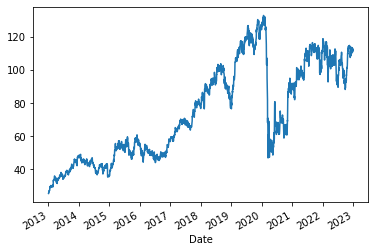

In [20]:
#Representation graphique, on va prendre le prix de cloture

df['Close'].plot()
plt.show()


## Prédiction des données

5 prix prévus : 
Date : 2023-01-02 00:00:00 Prix prévu : 116.13
Date : 2023-01-03 00:00:00 Prix prévu : 116.16
Date : 2023-01-04 00:00:00 Prix prévu : 116.19
Date : 2023-01-05 00:00:00 Prix prévu : 116.22
Date : 2023-01-06 00:00:00 Prix prévu : 116.26


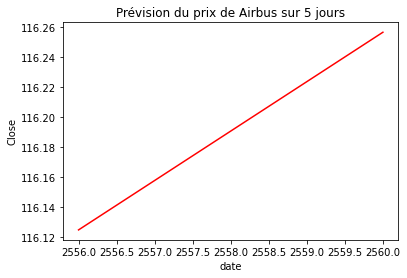

In [59]:
# Ajout d'une colonne date car elle n'est pas présente dans le Data frame
import matplotlib.dates as mdates
from datetime import datetime, timedelta
df['date'] = range(len(df))

# Sélection des X et y
X = df[['date']]
y = df['Close']

# Conversion des données 
X = X.values
y = y.values

# Division des données en ensemble d'entraînement et de test
X_test = X[-5:]
y_train = y[:-5]


# Modèle de regression linéaire
reg = LinearRegression().fit(X_train, y_train)

#Affichage à partir du 2 janvier 2023
print('5 prix prévus : ')
start_date = datetime(2023, 1, 2)
for i in range(5):
    current_date = start_date + timedelta(days=i)
    print('Date : {}'.format(current_date), 'Prix prévu : {:.2f}'.format(y_pred[i]))


plt.plot(X_test, y_pred, color='red')
plt.xlabel('date')
plt.ylabel('Close')
plt.title('Prévision du prix de Airbus sur 5 jours')
plt.show()

print()
